In [1]:
# start from Example 8.5 program odesim.py
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# constants
g     = 9.81	# m s^-2
m     = 1.0	# kg
rho   = 1.22	# kg m^-3
C     = 0.47	# unitless
R     = 0.08    # m
h     = 0.001   # seconds
theta = 30.0*(np.pi/180) # radians
v0    = 100.0	# m s^-1
const = (rho*C*np.pi*R**2)/(2.0*m)


In [3]:
# define the equations of motion
def f(r,const):
    x   = r[0]
    y   = r[1]
    vx  = r[2]
    vy  = r[3]
    fx  = vx
    fy  = vy
    fvx = -const*vx*np.sqrt(vx**2+vy**2)
    fvy = -g-const*vy*np.sqrt(vx**2+vy**2)
    return np.array([fx,fy,fvx,fvy],float)


In [4]:
# containers for output
r = np.array([0.0,0.0,v0*np.cos(theta),v0*np.sin(theta)],float)
xpoints = []
ypoints = []

# use fourth-order Runge-Kutta
while r[1]>=0:
    k1 = h*f(r,const)
    k2 = h*f(r+0.5*k1,const)
    k3 = h*f(r+0.5*k2,const)
    k4 = h*f(r+k3,const)
    r += (k1+2*k2+2*k3+k4)/6
    xpoints.append(r[0])
    ypoints.append(r[1])


/Users/John/anaconda/envs/stanenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


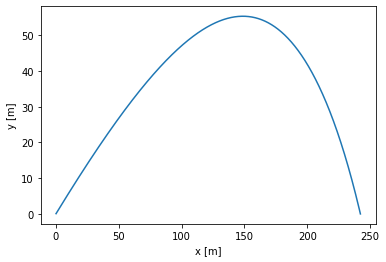

In [5]:
# make plot for part (b)
p1 = plt.figure(1)
plt.plot(xpoints,ypoints)
plt.xlabel("x [m]")
plt.ylabel('y [m]')
p1.show()


/Users/John/anaconda/envs/stanenv/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


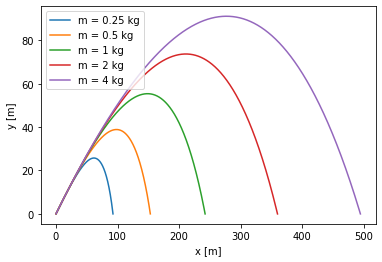

In [6]:
# try different values of m
p2 = plt.figure(2)
for m in [0.25,0.5,1,2,4]:
    const = (rho*C*np.pi*R**2)/(2.0*m)
    r = np.array([0.0,0.0,v0*np.cos(theta),v0*np.sin(theta)],float)
    xpoints = []
    ypoints = []

    # use fourth-order Runge-Kutta
    while r[1]>=0:
        k1 = h*f(r,const)
        k2 = h*f(r+0.5*k1,const)
        k3 = h*f(r+0.5*k2,const)
        k4 = h*f(r+k3,const)
        r += (k1+2*k2+2*k3+k4)/6
        xpoints.append(r[0])
        ypoints.append(r[1])

    plt.plot(xpoints,ypoints,label='m = '+str(m)+' kg')

plt.xlabel("x [m]")
plt.ylabel('y [m]')
plt.legend()
p2.show()
